<a href="https://colab.research.google.com/github/kennynlam/DATASCI-112-Final-Project/blob/main/DATASCI%20112%20Final%20Project%20(Data%20Exploration).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASCI 112 Final Project - Data Exploration**

In this notebook, I read in the district data file and explore relationships between certain variables. Foremostly, I wanted to see if there was a correlation between population change and enrollment change (it would be somewhat logical to assume that a district's enrollment would increase if its county population increased). I also made sure to use rates instead of enrollment #s themselves (previous year enrollment & current year enrollment #s have a high correlation, but we cannot make any conclusions from that whatsoever). 

To visualize my findings, I attempted to use a variety of graphing methods such as choropleths, scatter plots, bar graphs, etc. I discuss the findings of these graphs in their respective cells.



In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# reading in the district data file
data_dir = "/content/gdrive/My Drive/Colab Notebooks/DATASCI 112/Final Project/Data Files/"
df_districts = pd.read_csv(data_dir + "df_districts.csv").set_index("District Name")
df_districts

,County Name,Rating Area,2019-20 Enrollment,2020-21 Enrollment,Previous 2 Year Enrollment Change,Previous Year Enrollment Change,Previous 2 Year Population Change,Previous Year Population Change,2021-22 Enrollment,Urban,...,Percent ADA,Math Proficiency Rate,ELA Proficiency Rate,ISPP Index,Percent Free/Reduced Price Lunch,Percent IEP,Percent EL,2022-23 State Enrollment Projection,2022-23 Enrollment,Next Year Enrollment Change
District Name,,,,,,,,,,,,,,,,,,,,,
AGWSR Comm School District,Hardin,1,670.0,699.0,0.029851,-0.012876,-0.008192,-0.010072,690.0,False,...,92.1,0.573171,0.678049,51.372500,0.4311,0.142029,0.011,702.0,650.0,-0.057971
Alden Comm School District,Hardin,1,173.0,169.0,0.034682,0.059172,-0.008192,-0.010072,179.0,False,...,91.3,0.607595,0.670886,56.190000,0.4056,0.128492,0.049,279.0,159.0,-0.111732
Eldora-New Providence Comm School District,Hardin,1,574.0,529.0,-0.097561,-0.020794,-0.008192,-0.010072,518.0,False,...,93.0,0.650519,0.697917,53.070000,0.4235,0.173745,0.017,544.0,540.0,0.042471
Hubbard-Radcliffe Comm School District,Hardin,1,398.0,413.0,-0.057789,-0.092010,-0.008192,-0.010072,375.0,False,...,92.8,0.736434,0.697674,53.635000,0.3983,0.133333,0.011,447.0,377.0,0.005333
Iowa Falls Comm School District,Hardin,1,1314.0,1249.0,-0.029680,0.020817,-0.008192,-0.010072,1275.0,False,...,93.5,0.607692,0.762516,57.357500,0.3898,0.131765,0.031,984.0,1278.0,0.002353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sibley-Ocheyedan Comm School District,Osceola,3,769.0,766.0,-0.050715,-0.046997,0.033736,-0.005329,730.0,False,...,94.5,0.703297,0.746137,51.450000,0.5130,0.126027,0.103,716.0,729.0,-0.001370
South Hamilton Comm School District,Hamilton,1,721.0,688.0,-0.030513,0.015988,0.007717,-0.010107,699.0,False,...,93.2,0.802784,0.849188,61.995000,0.2395,0.092990,0.021,627.0,690.0,-0.012876
Stratford Comm School District,Hamilton,1,65.0,64.0,0.015385,0.031250,0.007717,-0.010107,66.0,False,...,92.9,0.846154,0.846154,54.440000,0.4528,0.106061,0.000,126.0,80.0,0.212121


In [ ]:
df_districts.columns

Index(['County Name', 'Rating Area', '2019-20 Enrollment',
       '2020-21 Enrollment', 'Previous 2 Year Enrollment Change',
       'Previous Year Enrollment Change', 'Previous 2 Year Population Change',
       'Previous Year Population Change', '2021-22 Enrollment', 'Urban',
       'Percent White', 'Percent Hispanic', 'Percent Asian', 'Percent Black',
       'Percent Multi-Race', 'Percent ADA', 'Math Proficiency Rate',
       'ELA Proficiency Rate', 'ISPP Index',
       'Percent Free/Reduced Price Lunch', 'Percent IEP', 'Percent EL',
       '2022-23 State Enrollment Projection', '2022-23 Enrollment',
       'Next Year Enrollment Change'],
      dtype='object')

# **Choropleths**

In [ ]:
import geopandas as gpd

In [ ]:
# reading in a shapefile of Iowa rating area boundaries
gdf_ra = gpd.read_file(data_dir + "Rating Areas SF.zip")
gdf_ra.rename(columns={"ratingarea": "Rating Area"}, inplace=True)
for i in range(len(gdf_ra["Rating Area"])):
  gdf_ra.loc[i, "Rating Area"] = gdf_ra.loc[i, "Rating Area"][12]
gdf_ra["Rating Area"] = gdf_ra["Rating Area"].astype(int)
gdf_ra

,Rating Area,counties,centroidx,centroidy,geometry
0,1,"Boone, Calhoun, Carroll, Greene, Grundy, Hamil...",-93.60,42.16,"POLYGON ((-94.42287 42.64525, -94.40308 42.645..."
1,2,"Dallas, Jasper, Madison, Marion, Polk, and Warren",-93.54,41.52,"POLYGON ((-94.18348 41.86351, -94.16427 41.863..."
2,3,"Buena Vista, Cherokee, Clay, Crawford, Dickins...",-95.58,42.75,"POLYGON ((-95.15114 43.50105, -95.13223 43.500..."
3,4,"Adair, Adams, Audubon, Cass, Clarke, Decatur, ...",-94.91,41.18,"POLYGON ((-96.00180 41.86362, -95.98273 41.863..."
4,5,"Appanoose, Davis, Des Moines, Henry, Jefferson...",-92.16,41.03,"POLYGON ((-91.34747 41.59836, -91.34658 41.598..."
5,6,"Benton, Black Hawk, Buchanan, Cedar, Clayton, ...",-91.37,42.15,"POLYGON ((-91.56844 43.08179, -91.54873 43.081..."
6,7,"Allamakee, Bremer, Butler, Cerro Gordo, Chicka...",-92.99,43.08,"POLYGON ((-94.75827 43.50105, -94.75055 43.501..."


In [ ]:
# building a function to graph features by rating area
def make_ra_choropleth(feature, c):
  # creating a df with a feature's average by rating area
  df = pd.DataFrame(df_districts.groupby("Rating Area")[feature].mean())
  gdf_ra_feature = gdf_ra.merge(df, on="Rating Area", how="outer")
  # standardizing a specific legend range for changes in enrollment
  if feature == "Next Year Enrollment Change" or feature == "Previous Year Enrollment Change":
    gdf_ra_feature.to_crs("NAD1983").plot(
    column=feature,
    legend=True,
    figsize=(10, 10),
    cmap=c,
    vmax=.03, vmin=-.03)
  else:
    gdf_ra_feature.to_crs("NAD1983").plot(
    column=feature,
    legend=True,
    figsize=(10, 10),
    cmap=c)
      

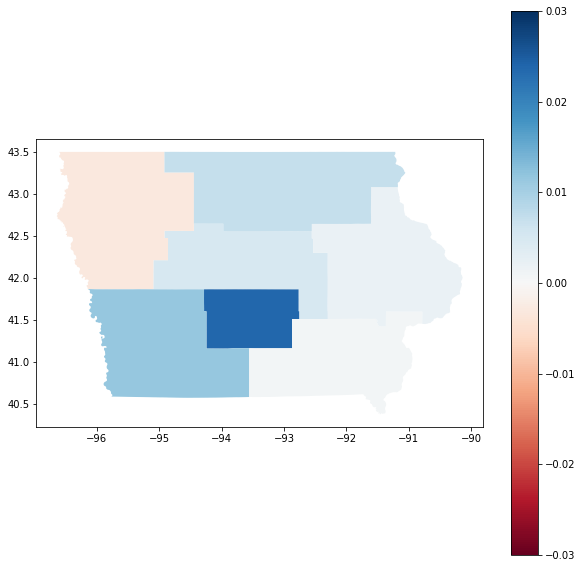

In [ ]:
# Choropleth of Average Changes in Enrollment from 2020-21 to 2021-22 by Rating Area
make_ra_choropleth("Previous Year Enrollment Change", "RdBu")
# Central rating area experienced the greatest increase in enrollment from 2020-21 to 2021-22

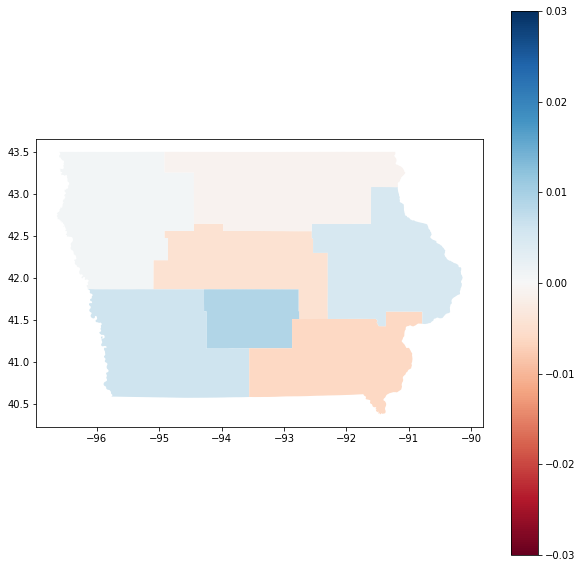

In [ ]:
# Choropleth of Average Changes in Enrollment from 2021-22 to 2022-23 by Rating Area
make_ra_choropleth("Next Year Enrollment Change", "RdBu")
# 3 out of 7 rating areas maintained average increases in enrollment from 2020-21 to 2022-23 (2 years)

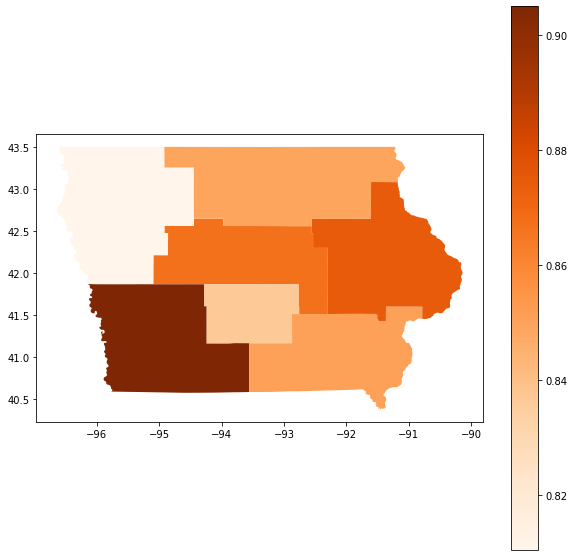

In [ ]:
# Choropleth of Average Percentages of White Students by Rating Area
make_ra_choropleth("Percent White", "Oranges")
# Northwest & Central rating areas have the lowest average % of white students

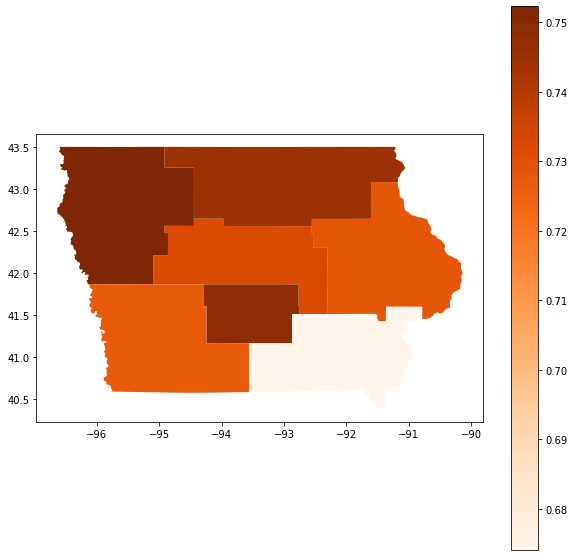

In [ ]:
# Choropleth of Average ELA Proficiency Rates by Rating Area
make_ra_choropleth("ELA Proficiency Rate", "Oranges")
# Northwest & Central rating areas have the highest average ELA proficiency rates

In [ ]:
# afterward, I decided to explore the data at a smaller, county-level scale
# reading in a shapefile of Iowa county boundaries
gdf_counties = gpd.read_file(data_dir + "Iowa_County_Boundaries")
gdf_counties.rename(columns={"CountyName": "County Name"}, inplace=True)
gdf_counties["County Name"].replace("Obrien", "O'Brien", inplace=True)
gdf_counties

,OBJECTID,PERIMETER,DOMCountyI,FIPS,FIPS_INT,County Name,StateAbbr,SHAPE_Leng,SHAPE_Area,geometry
0,1,193975.5,60,19119,19119,Lyon,IA,2.212753,0.169102,"POLYGON ((-96.59915 43.50033, -96.58647 43.500..."
1,2,130929.6,72,19143,19143,Osceola,IA,1.434543,0.114867,"POLYGON ((-95.86089 43.49998, -95.84104 43.499..."
2,3,131290.5,30,19059,19059,Dickinson,IA,1.438023,0.116176,"POLYGON ((-95.38781 43.50024, -95.37542 43.500..."
3,4,130956.8,32,19063,19063,Emmet,IA,1.434046,0.115803,"POLYGON ((-94.91476 43.50087, -94.89795 43.500..."
4,5,172890.3,3,19005,19005,Allamakee,IA,1.847862,0.189376,"POLYGON ((-91.61075 43.50060, -91.61061 43.500..."
...,...,...,...,...,...,...,...,...,...,...
94,95,144995.3,26,19051,19051,Davis,IA,1.526090,0.139393,"POLYGON ((-92.63926 40.89896, -92.62026 40.898..."
95,96,148600.8,27,19053,19053,Decatur,IA,1.558094,0.147367,"POLYGON ((-94.01480 40.89705, -93.99519 40.896..."
96,97,147785.1,93,19185,19185,Wayne,IA,1.551256,0.145582,"POLYGON ((-93.55648 40.89838, -93.53804 40.898..."
97,98,146566.5,4,19007,19007,Appanoose,IA,1.540049,0.142517,"POLYGON ((-93.09759 40.89823, -93.07897 40.898..."


In [ ]:
# building a function to graph features by county
def make_county_choropleth(feature, c):
  # creating a df with a feature's average by county
  df = pd.DataFrame(df_districts.groupby("County Name")[feature].mean())
  gdf_counties_feature = gdf_counties.merge(df, on="County Name", how="outer")
  # standardizing a specific legend range for changes in enrollment
  if feature == "Next Year Enrollment Change" or feature == "Previous Year Enrollment Change":
    gdf_counties_feature.to_crs("NAD1983").plot(
      column=feature,
      legend=True,
      figsize=(10, 10),
      cmap=c,
      vmax=.06, vmin=-.06)
  else:
    gdf_counties_feature.to_crs("NAD1983").plot(
      column=feature,
      legend=True,
      figsize=(10, 10),
      cmap=c)

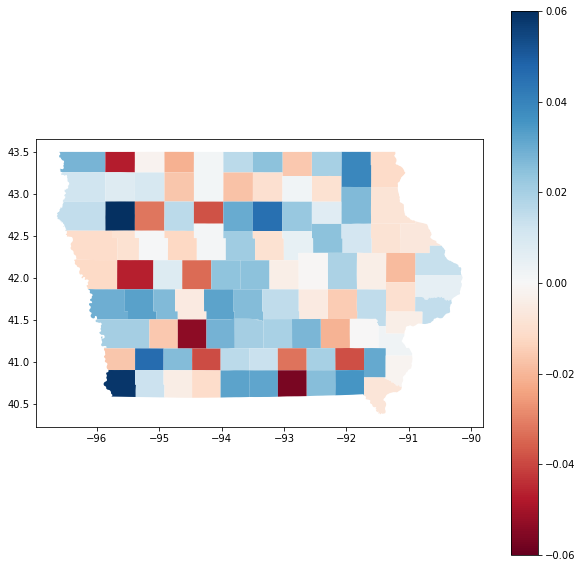

In [ ]:
# Choropleth of Average Changes in Enrollment from 2020-21 to 2021-22 by County
make_county_choropleth("Previous Year Enrollment Change", "RdBu")

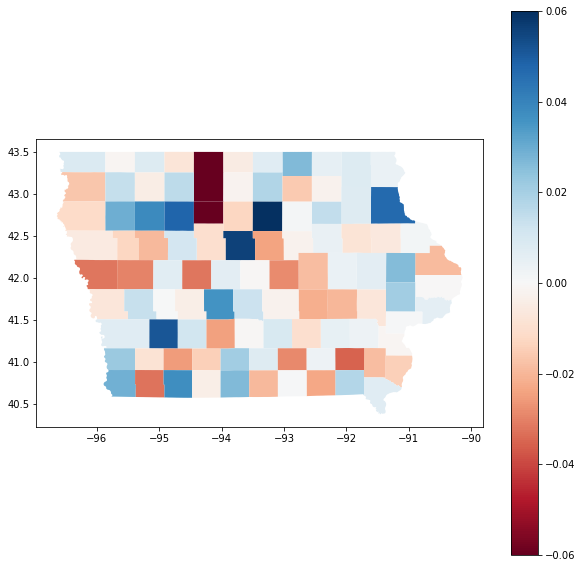

In [ ]:
# Choropleth of Average Changes in Enrollment from 2021-22 to 2022-23 by County
make_county_choropleth("Next Year Enrollment Change", "RdBu")
# unable to identify a specific trend in enrollment from 2020-21 to 2022-23 (some counties maintained average increases/decreases while others flip-flopped)

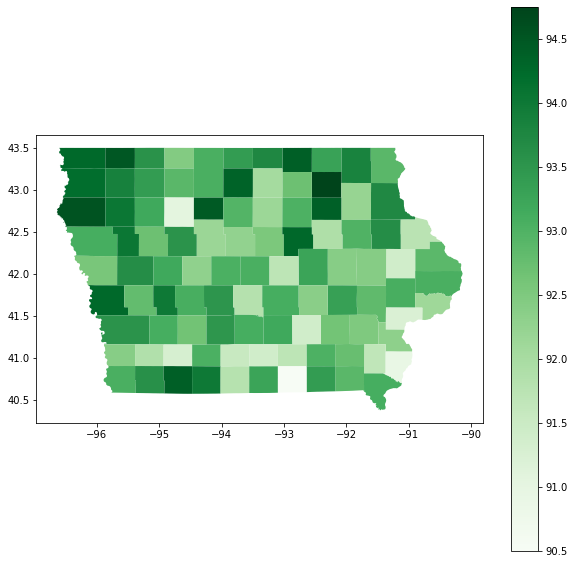

In [ ]:
# Choropleth of Average 2021-22 ADA Rates by County
make_county_choropleth("Percent ADA", "Greens")

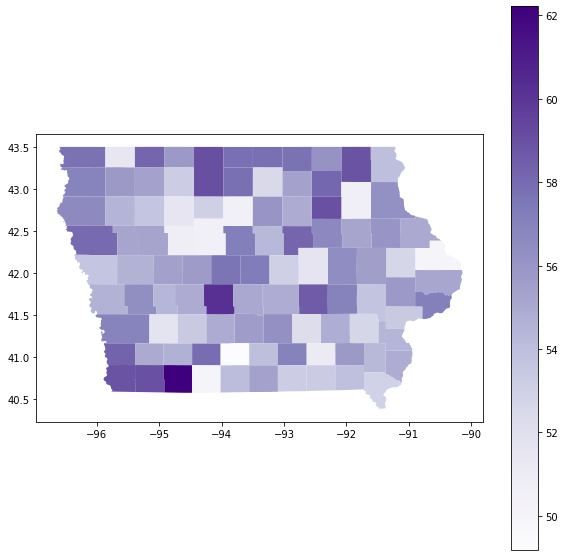

In [ ]:
# Choropleth of Average 2021-22 ISPP Indexes by County
make_county_choropleth("ISPP Index", "Purples")
# ADA & ISPP index choropleths slightly overlap at the county level (not enough to make a definitive conclusion)

# **Scatterplots**

In [ ]:
# computing a correlation matrix between 2020-21 to 2021-22 enrollment change and corresponding population change
df_districts[["Previous Year Enrollment Change", "Previous Year Population Change"]].corr()
# relatively weak correlation between enrollment change and population change

,Previous Year Enrollment Change,Previous Year Population Change
Previous Year Enrollment Change,1.000000,0.172706
Previous Year Population Change,0.172706,1.000000


<Axes: xlabel='Previous Year Enrollment Change', ylabel='Previous Year Population Change'>

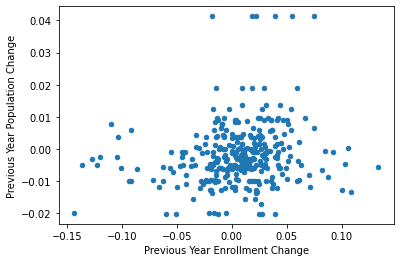

In [ ]:
# verifying this conclusion through a scatterplot
df_districts.plot.scatter(x="Previous Year Enrollment Change", y="Previous Year Population Change")

In [ ]:
# computing a correlation matrix between previous year enrollment change and next year enrollment change
df_districts[["Previous Year Enrollment Change", "Next Year Enrollment Change"]].corr()
# relatively weak correlation between the 2 variables (a previous year increase in enrollment does not imply a next year increase/decrease & vice versa)

,Previous Year Enrollment Change,Next Year Enrollment Change
Previous Year Enrollment Change,1.000000,0.072268
Next Year Enrollment Change,0.072268,1.000000


<Axes: xlabel='Previous Year Enrollment Change', ylabel='Next Year Enrollment Change'>

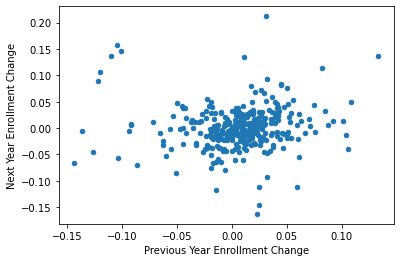

In [ ]:
# verifying this conclusion through a scatterplot
df_districts.plot.scatter(x="Previous Year Enrollment Change", y="Next Year Enrollment Change")

<Axes: xlabel='Math Proficiency Rate', ylabel='Percent ADA'>

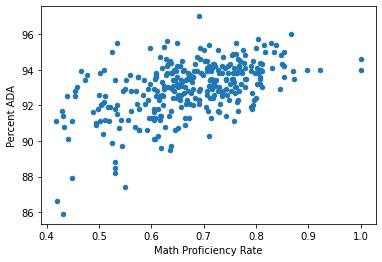

In [ ]:
# Scatterplot of Math Proficiency Rates vs. ADA Rates
df_districts.plot.scatter(x="Math Proficiency Rate", y="Percent ADA")
# somewhat positive correlation between the 2 variables (greater ADA rate may correspond w/ a greater math proficiency rate)

<Axes: xlabel='Percent Free/Reduced Price Lunch', ylabel='Percent ADA'>

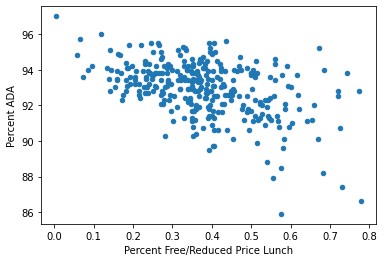

In [ ]:
# Scatterplot of FRPL Rates vs. ADA Rates
df_districts.plot.scatter(x="Percent Free/Reduced Price Lunch", y="Percent ADA")
# somewhat negative correlation between the 2 variables (greater FRPL rate may correspond w/ a lower ADA rate)

<Axes: xlabel='Percent IEP', ylabel='Percent ADA'>

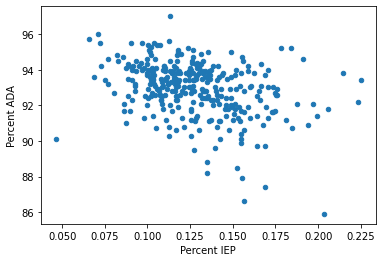

In [ ]:
# Scatterplot of IEP Rates vs. ADA Rates
df_districts.plot.scatter(x="Percent IEP", y="Percent ADA")
# slightly negative correlation between the 2 variables (greater IEP rate may correspond w/ a lower ADA rate)

In [ ]:
df_districts.corr()["Next Year Enrollment Change"]
# overall, the variable "Next Year Enrollment Change" has extremely weak correlation values w/ other singular variables
# suggests that a greater number of variables may be necessary to build a better prediction model

Rating Area                            0.001790
2019-20 Enrollment                    -0.009846
2020-21 Enrollment                    -0.003779
Previous 2 Year Enrollment Change      0.257224
Previous Year Enrollment Change        0.072268
Previous 2 Year Population Change      0.099085
Previous Year Population Change        0.122191
2021-22 Enrollment                    -0.002007
Urban                                 -0.051373
Percent White                          0.035503
Percent Hispanic                      -0.030134
Percent Asian                          0.010291
Percent Black                         -0.040634
Percent Multi-Race                    -0.013784
Percent ADA                            0.104483
Math Proficiency Rate                  0.082335
ELA Proficiency Rate                   0.104016
ISPP Index                             0.092451
Percent Free/Reduced Price Lunch      -0.153853
Percent IEP                           -0.158125
Percent EL                            -0

# **Bar Graphs**

In [ ]:
# using qcut to create categorical variables of quantitative variables w/ even distribution
df_districts["District Size"] = pd.qcut(df_districts["2021-22 Enrollment"], q=4) # splitting district enrollments into 4 categories by size
df_districts["ISPP Index Category"] = pd.qcut(df_districts["ISPP Index"], q=4) # splitting ispp indexes into 4 categories by value

<Axes: xlabel='District Size', ylabel='Average Next Year Enrollment Change'>

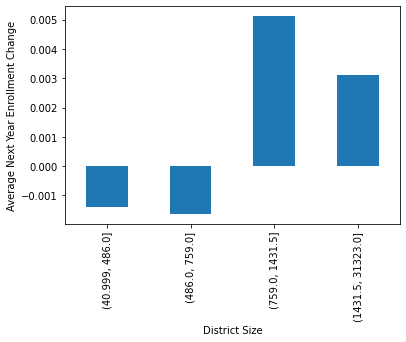

In [ ]:
# Bar Graph of Average Next Year Enrollment Changes by District Size
df_districts.groupby("District Size")["Next Year Enrollment Change"].mean().plot.bar(ylabel="Average Next Year Enrollment Change")
# larger districts experienced greater average increases in 2021-22 to 2022-23 enrollment than smaller districts (difference is admittedly very small)

<Axes: xlabel='District Size', ylabel='Average Previous Year Enrollment Change'>

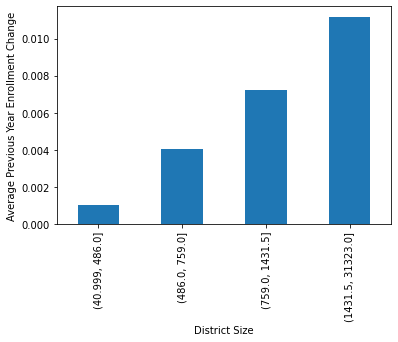

In [ ]:
# Bar Graph of Average Previous Year Enrollment Changes by District Size
df_districts.groupby("District Size")["Previous Year Enrollment Change"].mean().plot.bar(ylabel="Average Previous Year Enrollment Change")
# largest districts experienced the greatest average increase in 2020-21 to 2021-22 enrollment 

<Axes: xlabel='ISPP Index Category', ylabel='Average Next Year Enrollment Change'>

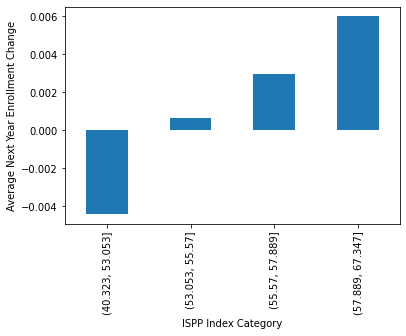

In [ ]:
# Bar Graph of Average Next Year Enrollment Changes by ISPP Index Category
df_districts.groupby("ISPP Index Category")["Next Year Enrollment Change"].mean().plot.bar(ylabel="Average Next Year Enrollment Change")
# districts w/ greater ISPP indexes experienced greater average increases in 2021-22 to 2022-23 enrollment than smaller districts (difference is admittedly very small)

<Axes: xlabel='Urban', ylabel='Average Next Year Enrollment Change'>

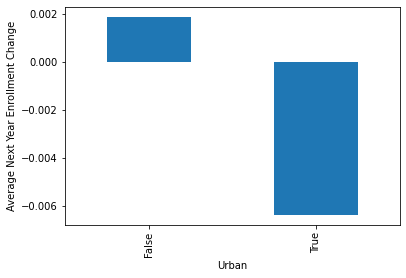

In [ ]:
# Bar Graph of Average Next Year Enrollment Changes by Urban/non-Urban Status
df_districts.groupby("Urban")["Next Year Enrollment Change"].mean().plot.bar(ylabel="Average Next Year Enrollment Change")
# urban districts experienced an average decrease in 2021-22 to 2022-23 enrollment, while non-urban districts experienced an average increase in enrollment

<Axes: xlabel='Urban', ylabel='Average Math Proficiency Rate'>

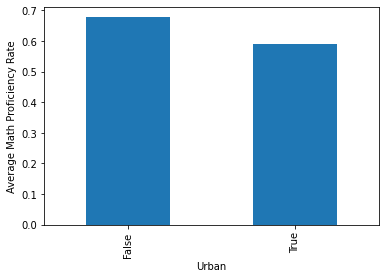

In [ ]:
# Bar Graph of Average Math Proficiency Rates by Urban/non-Urban Status
df_districts.groupby("Urban")["Math Proficiency Rate"].mean().plot.bar(ylabel="Average Math Proficiency Rate")
# non-urban districts have a greater average math proficiency rate than urban districts